<a href="https://colab.research.google.com/github/Paulina9555/Repo1/blob/master/Progremy_regresji_w_uczeniu_nadzorowanym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy

In [ ]:
import requests #biblioteka mająca za zadanie scrapping danych z neta
from bs4 import BeautifulSoup #funkcja rozparcelowywująca dane
import json
import numpy as np
import pandas as pd
from time import sleep
from matplotlib import pyplot as plt

# Scrapping

In [ ]:
page_number = 1

url = f'https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/slaskie/katowice/katowice/katowice?viewType=listing&limit=72&page={page_number}'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}


In [ ]:
response = requests.get(url, headers=headers)

In [ ]:
response

<Response [200]>

In [ ]:
# Jak dostajemy <Response [200]> to znaczy że udało się dobrze zadać response. Nie oznacza to że mamy załadowane dane.

In [ ]:
content = response.text

In [ ]:
content

'<!DOCTYPE html><html lang="pl"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><link rel="preconnect" href="https://statics.otodom.pl"/><link rel="icon" href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/favicon.svg"/><link rel="apple-touch-icon" href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png"/><link rel="android-touch-icon" href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png"/><meta property="fb:app_id" content="1490856384482695"/><meta property="og:image" content="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/fb/fb-image200x200.png?t=20-11-09"/><meta property="og:type" content="website"/><meta property="og:url" content="https://www.otodom.pl/"/><meta property=

In [ ]:
soup = BeautifulSoup(content, 'html.parser')

## Pierwszy sposób

In [ ]:
offers = soup.find_all('li', {'class': 'css-o9b79t e1dfeild0'})

In [ ]:
len(offers)

76

In [ ]:
offer = offers[0]

In [ ]:
offer.find('a', {'data-cy': 'listing-item-link'})

<a class="css-lsw81o e1dfeild2" data-cy="listing-item-link" href="/pl/oferta/4-pokojowe-mieszkanie-92m2-ogrodek-ID4jITw"><style data-emotion="css qou0ww">.css-qou0ww{position:relative;background-color:#ffffff;}@media (min-width:1160px){.css-qou0ww{margin:0;overflow:visible;}}</style><aside class="css-qou0ww e1m3uv040"><style data-emotion="css 1v1t6ro">.css-1v1t6ro{position:relative;height:inherit;}.css-1v1t6ro .image-gallery,.css-1v1t6ro .image-gallery-content,.css-1v1t6ro .image-gallery-slide-wrapper,.css-1v1t6ro .image-gallery-swipe,.css-1v1t6ro .image-gallery-slides,.css-1v1t6ro .image-gallery-slide>div,.css-1v1t6ro .image-gallery-slides .image-gallery-image{height:100%;}.css-1v1t6ro .image-gallery-slides::after{content:'';position:absolute;right:0;bottom:0;left:0;height:100%;background:linear-gradient(180deg, rgba(35, 46, 63, 0) 72.92%, #232e3f 100%);pointer-events:none;}.css-1v1t6ro .image-gallery-slides .image-gallery-image{object-fit:cover;}.css-1v1t6ro .image-gallery-index{top:

In [ ]:
print(offer.prettify())

<li class="css-o9b79t e1dfeild0" data-cy="listing-item">
 <style data-emotion="css lsw81o">
  .css-lsw81o{display:grid;grid-template-columns:100%;grid-template-rows:202px auto;-webkit-transition:all 0.2s ease-in-out;transition:all 0.2s ease-in-out;color:#1b232e;-webkit-text-decoration:none;text-decoration:none;contain-intrinsic-size:200px;}@media (min-width:500px){.css-lsw81o{grid-template-rows:410px auto;}}@media (min-width:992px){.css-lsw81o{grid-template-columns:280px 1fr;grid-template-rows:208px;}}@media (min-width:1160px){.css-lsw81o{grid-template-columns:280px 1fr;grid-template-rows:208px;}}
 </style>
 <a class="css-lsw81o e1dfeild2" data-cy="listing-item-link" href="/pl/oferta/4-pokojowe-mieszkanie-92m2-ogrodek-ID4jITw">
  <style data-emotion="css qou0ww">
   .css-qou0ww{position:relative;background-color:#ffffff;}@media (min-width:1160px){.css-qou0ww{margin:0;overflow:visible;}}
  </style>
  <aside class="css-qou0ww e1m3uv040">
   <style data-emotion="css 1v1t6ro">
    .css-1v1

In [ ]:
offer_url = 'https://www.otodom.pl'+offer.find('a',{'data-cy': 'listing-item-link'})['href']
details = offer.find_all('span',{'class': 'css-1cyxwvy ei6hyam2'})
price = float(details[0].get_text().replace('\xa0','').replace('zł','')) if details[0].get_text() !='Zapytaj o cenę' else None
rooms = int(details[2].get_text().split(' ')[0])
area = float(details[3].get_text().split(' ')[0])
location = offer.find('p', {'class': 'css-19dkezj e1n06ry53'}).get_text().split(',')[-3].strip()

ValueError: ignored

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="pl">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="https://statics.otodom.pl" rel="preconnect"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/favicon.svg" rel="icon"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="apple-touch-icon"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="android-touch-icon"/>
  <meta content="1490856384482695" property="fb:app_id"/>
  <meta content="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/fb/fb-image200x200.png?t=20-11-09" property="og:image"/>
  <meta content="website" property="og:type"/>
  <meta content="https://www.otodom.pl/" pr

In [ ]:
def get_offers(page_number):
  url = f'https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/slaskie/katowice/katowice/katowice?viewType=listing&limit=72&page={page_number}'
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
  response = requests.get(url, headers=headers)
  sleep(3)
  content = response.text
  soup = BeautifulSoup(content, 'html.parser')
  return soup.find_all('li', {'class': 'css-o9b79t e1dfeild0'})


def get_url(offer):
  return 'https://www.otodom.pl' + offer.find('a', {'data-cy': 'listing-item-link'})['href']


def get_details(offer):
  return offer.find_all('span', {'class': 'css-1cyxwvy ei6hyam2'})


def get_price(details):
  return float(details[0].get_text().replace('\xa0','').replace('zł','')) if details[0].get_text() != 'Zapytaj o cenę' else None


def get_rooms(details):
  return int(details[2].get_text().split(' ')[0])


def get_area(details):
  return float(details[3].get_text().split(' ')[0])


def get_location(offer):
  return offer.find('p', {'class': 'css-19dkezj e1n06ry53'}).get_text().split(',')[-3].strip()


def parse_offer(offer):
  url = get_url(offer)
  details = get_details(offer)
  price = get_price(details)
  rooms = get_rooms(details)
  area = get_area(details)
  location = get_location(offer)
  return {'url': url,
          'price': price,
          'rooms': rooms,
          'area': area,
          'location': location}

In [ ]:
data = []

for page_number in range(1,4):
  offers = get_offers(page_number)
  for i, offer in enumerate(offers):
    try:
      data.append(parse_offer(offer))
      if (i + 1) % 10 == 0:
        print(f'Parsed {i} offers from page {page_number}')
    except:
      print('warning')

warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning


In [ ]:
data[0]

{'url': 'https://www.otodom.pl/pl/oferta/mieszkanie-3-pokoje-z-balkonem-bogucice-ID4orIr',
 'price': 445000.0,
 'rooms': 3,
 'area': 61.0,
 'location': 'Bogucice'}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.to_csv('otodom.csv')

## Drugi sposób

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="pl">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="https://statics.otodom.pl" rel="preconnect"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/favicon.svg" rel="icon"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="apple-touch-icon"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="android-touch-icon"/>
  <meta content="1490856384482695" property="fb:app_id"/>
  <meta content="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/fb/fb-image200x200.png?t=20-11-09" property="og:image"/>
  <meta content="website" property="og:type"/>
  <meta content="https://www.otodom.pl/" pr

In [ ]:
text = soup.find('script', {'id': "__NEXT_DATA__"}).get_text()

In [ ]:
import json

In [ ]:
data_json = json.loads(text)

In [ ]:
offers = data_json['props']['pageProps']['data']['searchAds']['items']

In [ ]:
len(offers)

72

In [ ]:
offers[0]['areaInSquareMeters']

69.42

In [ ]:
offers[0]['totalPrice']['value']

550000

In [ ]:
data = []

for offer in offers:
  try:
    price = offer['totalPrice']['value']
  except:
    price = None

  data.append({'title': offer['title'],
               'price': price })

In [ ]:
df = pd.DataFrame(data)
df

,title,price
0,"Sprzedam mieszkanie, 69,42m2 4p. Katowice-Bogu...",550000.0
1,Francuska Park! Muchowiec! Nowe osiedle!,529000.0
2,Nowe Budownictwo! Ligota Park! Od zaraz!,650000.0
3,Miłe Zacisze/Tunelowa/Taras/ Od zaraz!,600000.0
4,Wykończone!nowe budownictwo!od zaraz! Park!,819000.0
...,...,...
67,4-pokojowe mieszkanie 85m2 + balkon Bezpośrednio,765133.0
68,1-pokojowe mieszkanie 29m2 + balkon,331090.0
69,2-pokojowe mieszkanie 46m2 + balkon Bez Prowizji,446200.0
70,"Koszutka, nowe okna, parkiet! Blok po termo!",389000.0


# EDA (Eksploracyjna Analiza Danych)

In [ ]:
df = pd.read_csv('otodom.csv')

In [ ]:
df

,Unnamed: 0,url,price,rooms,area,location
0,0,https://www.otodom.pl/pl/oferta/mieszkanie-3-p...,445000.0,3,61.0,Bogucice
1,1,https://www.otodom.pl/pl/oferta/francuska-park...,529000.0,2,42.0,Osiedle Paderewskiego-Muchowiec
2,2,https://www.otodom.pl/pl/oferta/mile-zacisze-t...,600000.0,2,62.0,Zarzecze
3,3,https://www.otodom.pl/pl/oferta/wykonczone-now...,819000.0,3,68.0,Dąb
4,4,https://www.otodom.pl/pl/oferta/gotowa-inwesty...,304000.0,4,59.0,Kostuchna
5,5,https://www.otodom.pl/pl/oferta/brynow-2-pokoj...,345000.0,2,45.0,Brynów-Osiedle Zgrzebnioka
6,6,https://www.otodom.pl/pl/oferta/komfortowa-sze...,1199000.0,4,150.0,Podlesie
7,7,https://www.otodom.pl/pl/oferta/trzy-obszerne-...,545000.0,3,84.0,Śródmieście
8,8,https://www.otodom.pl/pl/oferta/okazja-gwiazdy...,509000.0,3,53.0,Zawodzie
9,9,https://www.otodom.pl/pl/oferta/m3-pierwsze-pi...,329000.0,2,46.0,Murcki


In [ ]:
df.describe()

,Unnamed: 0,price,rooms,area
count,35.000000,3.500000e+01,35.000000,35.000000
mean,17.000000,5.294171e+05,2.857143,63.228571
std,10.246951,2.074754e+05,1.004193,26.815366
min,0.000000,1.950000e+05,1.000000,25.000000
25%,8.500000,4.040000e+05,2.000000,46.000000
50%,17.000000,4.890000e+05,3.000000,57.000000
75%,25.500000,6.250000e+05,3.000000,68.000000
max,34.000000,1.199000e+06,7.000000,150.000000


In [ ]:
df['location'].str.strip().value_counts()

Śródmieście                        6
Piotrowice-Ochojec                 4
Bogucice                           3
Kostuchna                          3
Koszutka                           3
Zarzecze                           2
Dąb                                2
Zawodzie                           2
Załęska Hałda-Brynów               2
Osiedle Tysiąclecia                2
Osiedle Paderewskiego-Muchowiec    1
Brynów-Osiedle Zgrzebnioka         1
Podlesie                           1
Murcki                             1
Giszowiec                          1
Ligota-Panewniki                   1
Name: location, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35 non-null     int64  
 1   url         35 non-null     object 
 2   price       35 non-null     float64
 3   rooms       35 non-null     int64  
 4   area        35 non-null     float64
 5   location    35 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]['url']

Series([], Name: url, dtype: object)

## Pandas profiling

In [ ]:
!pip install pandas_profiling --upgrade
!pip install markupsafe==2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3854e419a010e1b477dc97590412c1a47840f54285a81edf134434a3fcd5b215
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [ ]:
from pandas_profiling import ProfileReport

ImportError: ignored

In [ ]:
!pip install pandas_profiling --upgrade
!pip install markupsafe==2.0.1

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
from pandas._libs.lib import infer_dtype
prof = ProfileReport(df, infer_dtypes=False)

NameError: ignored

In [ ]:
prof.to_file('report.html')

NameError: ignored

In [ ]:
df = df.drop_duplicates()
df = df[df['price'].notnull()]

In [ ]:
price_95p = df['price'].quantile(0.95)

In [ ]:
price_99p = df['price'].quantile(0.99)

In [ ]:
df = df[df['price'] <= price_95p]

In [ ]:
prof = ProfileReport(df, infer_dtypes=False)
prof.to_file('report1.html')


NameError: ignored

### Seaborn

In [ ]:
import seaborn as sns

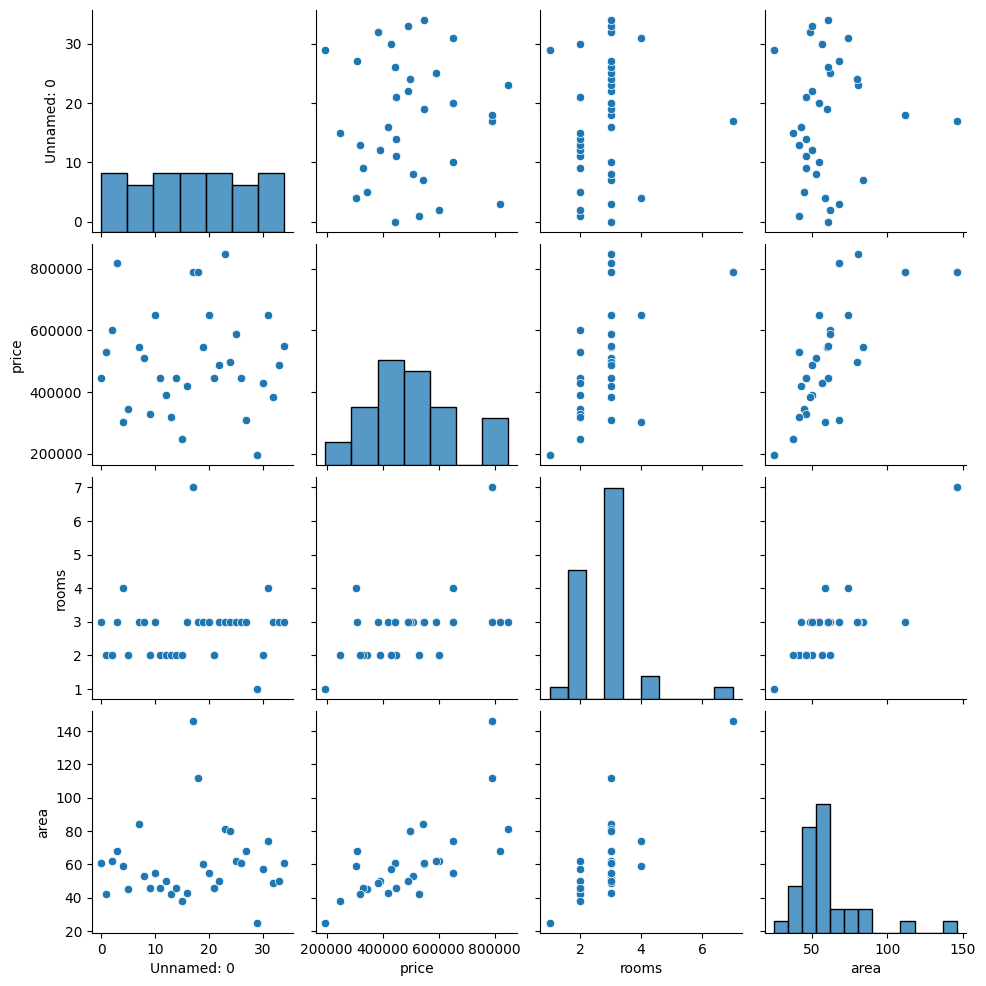

In [ ]:
sns.pairplot(df)

<ipython-input-50-713f4f55dade>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


<Axes: >

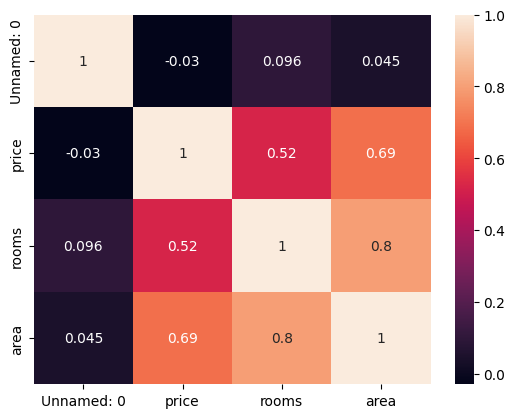

In [ ]:
cm = df.corr()
sns.heatmap(cm, annot=True)

<Axes: >

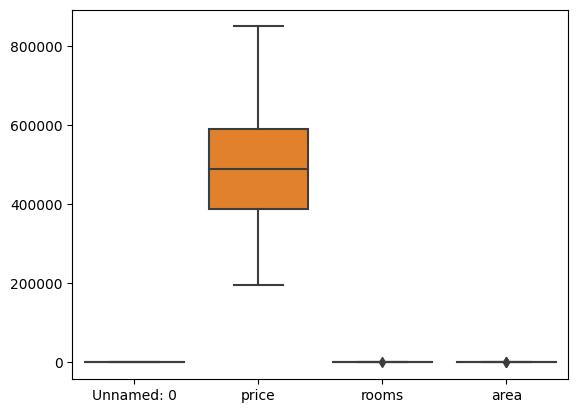

In [ ]:
sns.boxplot(df)

In [ ]:
df_std = (df - df.mean()) / df.std()

<ipython-input-52-7c27e3b245df>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = (df - df.mean()) / df.std()
<ipython-input-52-7c27e3b245df>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = (df - df.mean()) / df.std()


<Axes: >

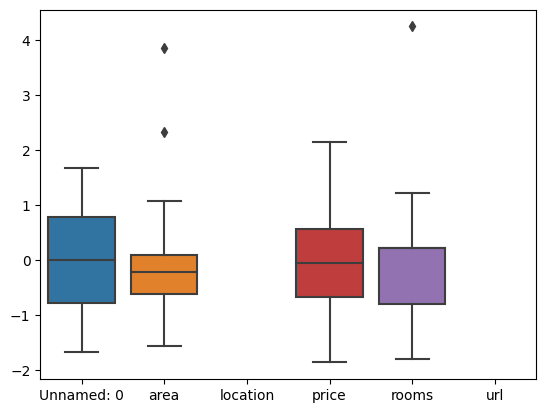

In [ ]:
sns.boxplot(df_std)

#Regresja

##Regresja jednej zmiennej

In [ ]:
df = df[df['area'] <= 250]

In [ ]:
X = df['area']
y = df['price']

plt.plot(X, y, '.')

a = 0
b = y.mean()

y_pred = a * X + b

plt.plot(X, y_pred, '.')
plt.show()

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['area']]
y = df['price']

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lr.predict(X)

In [ ]:
y_pred

array([503674.41820669, 408327.77332903, 508692.66267394, 538802.12947741,
       493637.9292722 , 423382.50673076, 619094.04095334, 463528.46246873,
       428400.75119801, 473564.95140322, 428400.75119801, 448473.72906699,
       408327.77332903, 428400.75119801, 388254.79546004, 413346.01779627,
       930225.19792257, 759604.88603622, 498656.17373945, 473564.95140322,
       428400.75119801, 448473.72906699, 604039.30755161, 599021.06308436,
       508692.66267394, 503674.41820669, 538802.12947741, 323017.61738585,
       483601.44033771, 568911.59628089, 443455.48459974, 448473.72906699,
       503674.41820669])

ConversionError: ignored

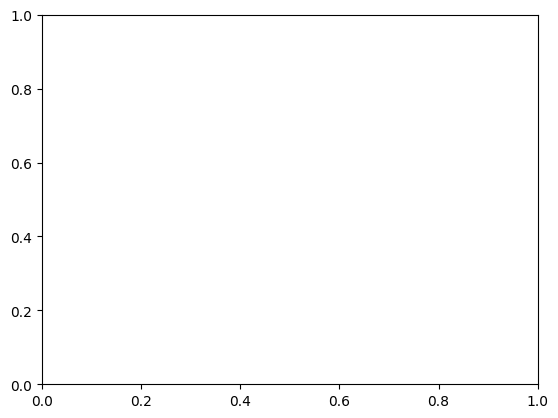

In [ ]:
plt.plot(X, y, '.')
plt.plot(X, y_pred, '.')

In [ ]:
lr.coef_

array([5018.24446725])

##Regresja wielu zmiennych

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df, x='area', y='rooms', z='price')
fig.show()

In [ ]:
X = df[['area', 'rooms']]
y = df[['price']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [ ]:
sc.mean_

array([59.90909091,  2.78787879])

In [ ]:
sc.var_

array([485.96143251,   0.95500459])

In [ ]:
X_std = sc.transform(X)

In [ ]:
X.values.mean(axis=0)

array([59.90909091,  2.78787879])

In [ ]:
X_std.mean(axis=0)
X_std.std(axis=0)

array([1., 1.])

In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_std, y)

LinearRegression()

In [ ]:
lr.coef_

array([[121400.47261348, -13525.84365451]])

In [ ]:
sample = X.sample()

In [ ]:
sample

,area,rooms
13,42.0,2


In [ ]:
sample_std=sc.transform(sample)

In [ ]:
lr.predict(sample_std)

array([[410478.49081252]])

In [ ]:
lr.score(X_std,y)

0.4760065300527009

In [ ]:
df['location'].str.strip().value_counts()

Śródmieście                        6
Piotrowice-Ochojec                 4
Bogucice                           3
Kostuchna                          3
Koszutka                           3
Zarzecze                           2
Zawodzie                           2
Załęska Hałda-Brynów               2
Osiedle Tysiąclecia                2
Osiedle Paderewskiego-Muchowiec    1
Dąb                                1
Brynów-Osiedle Zgrzebnioka         1
Murcki                             1
Giszowiec                          1
Ligota-Panewniki                   1
Name: location, dtype: int64

In [ ]:
df['location'] = df['location'].str.strip()

In [ ]:
df['location'].value_counts()

Śródmieście                        6
Piotrowice-Ochojec                 4
Bogucice                           3
Kostuchna                          3
Koszutka                           3
Zarzecze                           2
Zawodzie                           2
Załęska Hałda-Brynów               2
Osiedle Tysiąclecia                2
Osiedle Paderewskiego-Muchowiec    1
Dąb                                1
Brynów-Osiedle Zgrzebnioka         1
Murcki                             1
Giszowiec                          1
Ligota-Panewniki                   1
Name: location, dtype: int64

##Regresja ze zmiennymi kategorycznymi

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(min_frequency=0.1,
                    handle_unknown='ignore')

In [ ]:
ohe.fit(df[['location']])

OneHotEncoder(handle_unknown='ignore', min_frequency=0.1)

In [ ]:
location_ohe = ohe.transform(df[['location']])

In [ ]:
location_ohe = ohe.fit_transform(df[['location']])

In [ ]:
location_ohe.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
ohe.get_feature_names_out()

array(['location_Piotrowice-Ochojec', 'location_Śródmieście',
       'location_infrequent_sklearn'], dtype=object)

In [ ]:
pd.DataFrame(location_ohe.toarray(),
             columns = ohe.get_feature_names_out())

,location_Piotrowice-Ochojec,location_Śródmieście,location_infrequent_sklearn
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [ ]:
sample = pd.DataFrame([{'location': 'Koszutka'}])

In [ ]:
sample

,location
0,Koszutka


In [ ]:
ohe.transform(sample).toarray()

array([[0., 0., 1.]])

In [ ]:
numeric_features = ['area', 'rooms']
categorical_features = ['location']

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
sc = StandardScaler()
ohe = OneHotEncoder(min_frequency=0.1,
                    handle_unknown='ignore')

In [ ]:
cf = ColumnTransformer(
    transformers = [
        ('sc', sc, numeric_features),
        ('ohe', ohe, categorical_features)
    ]
)

In [ ]:
X = df[['area', 'rooms', 'location']]

In [ ]:
X = df[numeric_features + categorical_features]
X

,area,rooms,location
0,61.0,3,Bogucice
1,42.0,2,Osiedle Paderewskiego-Muchowiec
2,62.0,2,Zarzecze
3,68.0,3,Dąb
4,59.0,4,Kostuchna
5,45.0,2,Brynów-Osiedle Zgrzebnioka
7,84.0,3,Śródmieście
8,53.0,3,Zawodzie
9,46.0,2,Murcki
10,55.0,3,Piotrowice-Ochojec


In [ ]:
X_processed = cf.fit_transform(X)

In [ ]:
cf.get_feature_names_out()

array(['sc__area', 'sc__rooms', 'ohe__location_Piotrowice-Ochojec',
       'ohe__location_Śródmieście', 'ohe__location_infrequent_sklearn'],
      dtype=object)

In [ ]:
pd.DataFrame(X_processed,
             columns = cf.get_feature_names_out())

,sc__area,sc__rooms,ohe__location_Piotrowice-Ochojec,ohe__location_Śródmieście,ohe__location_infrequent_sklearn
0,0.049487,0.217061,0.0,0.0,1.0
1,-0.812405,-0.806226,0.0,0.0,1.0
2,0.094849,-0.806226,0.0,0.0,1.0
3,0.367026,0.217061,0.0,0.0,1.0
4,-0.041239,1.240347,0.0,0.0,1.0
5,-0.676317,-0.806226,0.0,0.0,1.0
6,1.092829,0.217061,0.0,1.0,0.0
7,-0.313415,0.217061,0.0,0.0,1.0
8,-0.630954,-0.806226,0.0,0.0,1.0
9,-0.222690,0.217061,1.0,0.0,0.0


In [ ]:
lr = LinearRegression()
lr.fit(X_processed, y)

LinearRegression()

In [ ]:
lr.score(X_processed, y)

0.5350247243797117

In [ ]:
sample = X.sample()

In [ ]:
sample

,area,rooms,location
15,38.0,2,Kostuchna


In [ ]:
sample = cf.transform(sample)
lr.predict(sample)

array([[384555.01843781]])

##Regresja liniowa wielomianowa

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df[['area']]
y = df[['price']]

In [ ]:
pf = PolynomialFeatures(degree=3,
                        include_bias=False)

In [ ]:
X_poly = pf.fit_transform(X)

NameError: ignored

In [ ]:
X

,area
0,61.0
1,42.0
2,62.0
3,68.0
4,59.0
5,45.0
7,84.0
8,53.0
9,46.0
10,55.0


In [ ]:
X_poly

array([[6.100000e+01, 3.721000e+03, 2.269810e+05],
       [4.200000e+01, 1.764000e+03, 7.408800e+04],
       [6.200000e+01, 3.844000e+03, 2.383280e+05],
       [6.800000e+01, 4.624000e+03, 3.144320e+05],
       [5.900000e+01, 3.481000e+03, 2.053790e+05],
       [4.500000e+01, 2.025000e+03, 9.112500e+04],
       [8.400000e+01, 7.056000e+03, 5.927040e+05],
       [5.300000e+01, 2.809000e+03, 1.488770e+05],
       [4.600000e+01, 2.116000e+03, 9.733600e+04],
       [5.500000e+01, 3.025000e+03, 1.663750e+05],
       [4.600000e+01, 2.116000e+03, 9.733600e+04],
       [5.000000e+01, 2.500000e+03, 1.250000e+05],
       [4.200000e+01, 1.764000e+03, 7.408800e+04],
       [4.600000e+01, 2.116000e+03, 9.733600e+04],
       [3.800000e+01, 1.444000e+03, 5.487200e+04],
       [4.300000e+01, 1.849000e+03, 7.950700e+04],
       [1.460000e+02, 2.131600e+04, 3.112136e+06],
       [1.120000e+02, 1.254400e+04, 1.404928e+06],
       [6.000000e+01, 3.600000e+03, 2.160000e+05],
       [5.500000e+01, 3.025000e

In [ ]:
lr =LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [ ]:
lr.coef_

array([[ 1.61686136e+04, -9.34873307e+01,  1.86519188e-01]])

In [ ]:
lr.score(X_poly, y)

NameError: ignored

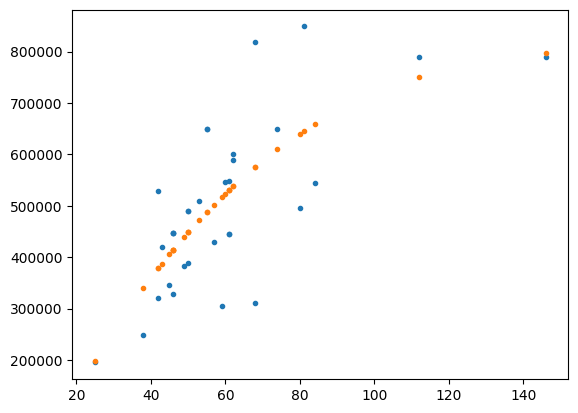

In [ ]:
plt.plot(X, y, '.')
plt.plot(X, lr.predict(X_poly), '.')

In [ ]:
X = df[numeric_features + categorical_features]

In [ ]:
cf = ColumnTransformer(
    transformers = [
        ('sc', sc, numeric_features),
        ('pf', pf, numeric_features),
        ('ohe', ohe, categorical_features)
    ]
)
#Najpierw standaryzacja danych 'sc' a potem jakies operacje 'pf', 'ohe'

In [ ]:
X_processed = cf.fit_transform(X)

In [ ]:
cf.get_feature_names_out()

array(['sc__area', 'sc__rooms', 'pf__area', 'pf__rooms', 'pf__area^2',
       'pf__area rooms', 'pf__rooms^2', 'pf__area^3', 'pf__area^2 rooms',
       'pf__area rooms^2', 'pf__rooms^3',
       'ohe__location_Piotrowice-Ochojec', 'ohe__location_Śródmieście',
       'ohe__location_infrequent_sklearn'], dtype=object)

In [ ]:
lr = LinearRegression()
lr.fit(X_processed, y)

LinearRegression()

In [ ]:
lr.score(X_processed, y)

0.6551420631455813

#Drzewa decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = df[['area']]

In [ ]:
dtr = DecisionTreeRegressor(max_depth=3,
                            min_samples_leaf=20,
                            min_samples_split=30
                            )

In [ ]:
dtr.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, min_samples_split=30)

In [ ]:
dtr.score(X, y)

NotFittedError: ignored

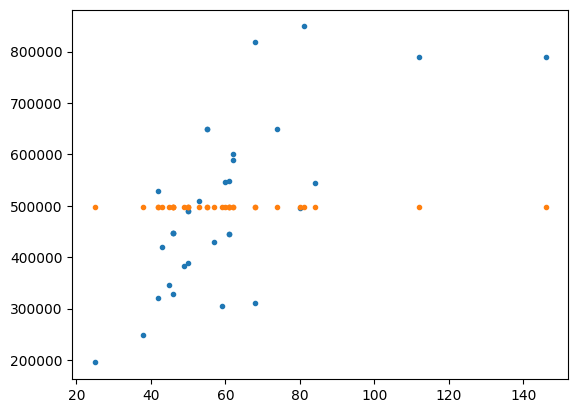

In [ ]:
plt.plot(X, y, '.')
plt.plot(X, dtr.predict(X), '.')

In [ ]:
from sklearn import tree

In [ ]:
dtr.feature_names_in_

AttributeError: ignored

In [ ]:
tr = tree.export_text(dtr,
                      feature_names = dtr.feature_names_in_)

print(tr)

|--- area <= 64.50
|   |--- area <= 38.10
|   |   |--- area <= 25.32
|   |   |   |--- value: [166524.39]
|   |   |--- area >  25.32
|   |   |   |--- value: [312444.78]
|   |--- area >  38.10
|   |   |--- area <= 50.33
|   |   |   |--- value: [453181.05]
|   |   |--- area >  50.33
|   |   |   |--- value: [527446.22]
|--- area >  64.50
|   |--- area <= 83.46
|   |   |--- area <= 76.15
|   |   |   |--- value: [642290.92]
|   |   |--- area >  76.15
|   |   |   |--- value: [717986.92]
|   |--- area >  83.46
|   |   |--- area <= 88.15
|   |   |   |--- value: [755434.68]
|   |   |--- area >  88.15
|   |   |   |--- value: [834106.82]



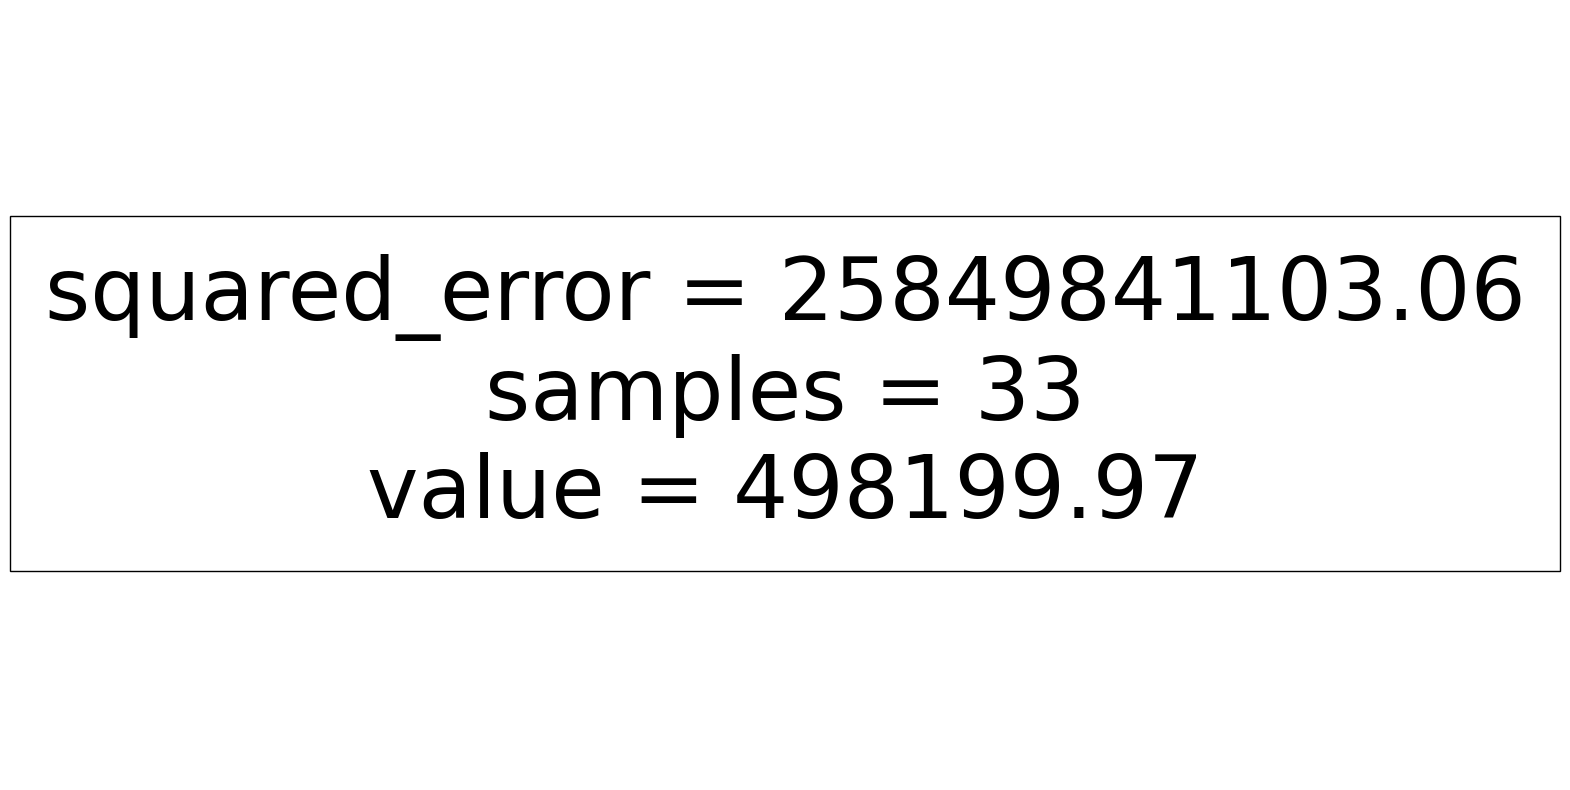

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

tree.plot_tree(dtr,
               feature_names = dtr.feature_names_in_,
               filled = True)

plt.show()

#Podział zbiorów

##Podział na zbiór treningowy, walidacyjny i testowy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['area', 'rooms', 'location']]
y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X)

33

In [ ]:
len(X_train)

26

In [ ]:
1929/2412

0.7997512437810945

##Wydzielenie zbioru walidacyjnego

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

##Przygotowanie zbioru treningowego

In [ ]:
numeric_features = ['area', 'rooms']
categorical_features = ['location']

In [ ]:
sc = StandardScaler()
pf = PolynomialFeatures(degree=3)
ohe = OneHotEncoder(handle_unknown = 'ignore',
                    min_frequency=0.1)

#Najpierw podziały na zbiory i na zbiorze treningowym robimy to co wcześniej było robione.


In [ ]:
cf = ColumnTransformer(
    transformers = [
        ('sc', sc, numeric_features),
        ('pf', pf, numeric_features),
        ('ohe', ohe, categorical_features)
    ]
)

In [ ]:
X_train_processed = cf.fit_transform(X_train)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
lr.score(X_train_processed, y_train)

0.9758301971011282

##Walidacja modelu

In [ ]:
X_val_processed = cf.transform(X_val)

In [ ]:
lr.score(X_val_processed, y_val)

-1.0599155496974437

##Test modelu

In [ ]:
X_test_processed = cf.transform(X_test)

In [ ]:
lr.score(X_test_processed, y_test)

-36.095738364207186

#Walidacja krzyżowa

In [ ]:
X = df[['area', 'rooms', 'location']]
y = df[['price']]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtr = DecisionTreeRegressor()

params = {'max_depth': [5, 10, 15],
          'min_samples_split': [20, 30, 40]}

In [ ]:
gs = GridSearchCV(dtr,
                  param_grid = params,
                  cv = 10,
                  verbose = 3)

In [ ]:
X_train_processed = cf.fit_transform(X_train)

In [ ]:
gs.fit(X_train_processed, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END max_depth=5, min_samples_split=20;, score=-564.566 total time=   0.0s
[CV 2/10] END max_depth=5, min_samples_split=20;, score=-1.123 total time=   0.0s
[CV 3/10] END max_depth=5, min_samples_split=20;, score=-8.333 total time=   0.0s
[CV 4/10] END max_depth=5, min_samples_split=20;, score=-75.621 total time=   0.0s
[CV 5/10] END max_depth=5, min_samples_split=20;, score=-0.015 total time=   0.0s
[CV 6/10] END max_depth=5, min_samples_split=20;, score=0.000 total time=   0.0s
[CV 7/10] END ..max_depth=5, min_samples_split=20;, score=nan total time=   0.0s
[CV 8/10] END ..max_depth=5, min_samples_split=20;, score=nan total time=   0.0s
[CV 9/10] END ..max_depth=5, min_samples_split=20;, score=nan total time=   0.0s
[CV 10/10] END .max_depth=5, min_samples_split=20;, score=nan total time=   0.0s
[CV 1/10] END max_depth=5, min_samples_split=30;, score=-564.566 total time=   0.0s
[CV 2/10] END max_depth=5, min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/

[CV 6/10] END max_depth=10, min_samples_split=20;, score=0.000 total time=   0.0s
[CV 7/10] END .max_depth=10, min_samples_split=20;, score=nan total time=   0.0s
[CV 8/10] END .max_depth=10, min_samples_split=20;, score=nan total time=   0.0s
[CV 9/10] END .max_depth=10, min_samples_split=20;, score=nan total time=   0.0s
[CV 10/10] END max_depth=10, min_samples_split=20;, score=nan total time=   0.0s
[CV 1/10] END max_depth=10, min_samples_split=30;, score=-564.566 total time=   0.0s
[CV 2/10] END max_depth=10, min_samples_split=30;, score=-1.123 total time=   0.0s
[CV 3/10] END max_depth=10, min_samples_split=30;, score=-8.333 total time=   0.0s
[CV 4/10] END max_depth=10, min_samples_split=30;, score=-75.621 total time=   0.0s
[CV 5/10] END max_depth=10, min_samples_split=30;, score=-0.015 total time=   0.0s
[CV 6/10] END max_depth=10, min_samples_split=30;, score=0.000 total time=   0.0s
[CV 7/10] END .max_depth=10, min_samples_split=30;, score=nan total time=   0.0s
[CV 8/10] END

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/

[CV 9/10] END .max_depth=15, min_samples_split=20;, score=nan total time=   0.0s
[CV 10/10] END max_depth=15, min_samples_split=20;, score=nan total time=   0.0s
[CV 1/10] END max_depth=15, min_samples_split=30;, score=-564.566 total time=   0.0s
[CV 2/10] END max_depth=15, min_samples_split=30;, score=-1.123 total time=   0.0s
[CV 3/10] END max_depth=15, min_samples_split=30;, score=-8.333 total time=   0.0s
[CV 4/10] END max_depth=15, min_samples_split=30;, score=-75.621 total time=   0.0s
[CV 5/10] END max_depth=15, min_samples_split=30;, score=-0.015 total time=   0.0s
[CV 6/10] END max_depth=15, min_samples_split=30;, score=0.000 total time=   0.0s
[CV 7/10] END .max_depth=15, min_samples_split=30;, score=nan total time=   0.0s
[CV 8/10] END .max_depth=15, min_samples_split=30;, score=nan total time=   0.0s
[CV 9/10] END .max_depth=15, min_samples_split=30;, score=nan total time=   0.0s
[CV 10/10] END max_depth=15, min_samples_split=30;, score=nan total time=   0.0s
[CV 1/10] END 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [20, 30, 40]},
             verbose=3)

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=20)

In [ ]:
gs.best_score_

nan

In [ ]:
X_test_processed = cf.transform(X_test)


In [ ]:
gs.score(X_test_processed, y_test)

-0.00950305339609403